# Примеры запуска pipeline распознавания лиц

## Импорты библиотек и моделей

In [166]:
import torch
import gc

# удаляем модуль из кэша перед импортом - это для этапа тестирования и исправления багов в коде pipeline_oav.py
import sys
if 'pipeline_oav' in sys.modules:
    del sys.modules['pipeline_oav']

from pipeline_oav import FR_Pipeline, compare_faces, visualize_similarity_matrix

## Проверка готовности GPU

In [48]:
if DEVICE.type == 'cuda':
    gc.collect(); torch.cuda.empty_cache()
    pass

print(f"PyTorch версия: {torch.__version__}")
print(f"CUDA доступна: {torch.cuda.is_available()}")
print(f"Версия CUDA: {torch.version.cuda}")
print(f"Количество GPU: {torch.cuda.device_count()}")

if torch.cuda.is_available():
    print(f"Текущее устройство: {torch.cuda.current_device()}")
    print(f"Имя устройства: {torch.cuda.get_device_name(0)}")
    print(f"Память: {torch.cuda.mem_get_info()[0]/1024**3:.2f} GB свободно из {torch.cuda.mem_get_info()[1]/1024**3:.2f} GB")

    # Проверка простой операции на GPU
    try:
        test_tensor = torch.randn(100, 100).to(DEVICE)
        print("Тестовый тензор на GPU создан успешно")
    except Exception as e:
        print(f"Ошибка при создании тензора: {e}")

PyTorch версия: 2.2.2+cu121
CUDA доступна: True
Версия CUDA: 12.1
Количество GPU: 1
Текущее устройство: 0
Имя устройства: NVIDIA GeForce RTX 2060
Память: 3.58 GB свободно из 5.79 GB
Тестовый тензор на GPU создан успешно


## Экземпляр класса FR_Pipeline

In [167]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#print(f"Используемое устройство: {DEVICE}")

pipeline = FR_Pipeline(
    hourglass_state_path='checkpoints/StackedHourglass_best_model_nme_20260123_233506_epoch_64_nme_5.60.pth',
    arcface_state_path='checkpoints/arcface_model_20260126_163544_epoch_38_val_0.7848.pth',
    device=DEVICE
)

Вычислительное устройство: cuda
Модель детектора mtcnn создана!
Модель StackedHourglass создана, веса загружены: checkpoints/StackedHourglass_best_model_nme_20260123_233506_epoch_64_nme_5.60.pth
Модель ArcFace создана, веса загружены: checkpoints/arcface_model_20260126_163544_epoch_38_val_0.7848.pth


## Распознавание лиц на одном изображении

На изображении  image1.jpg   обнаружено 7 лиц.
	лицо 1 сохранено в image1_1.jpg;   эмбеддинг получен.
	лицо 2 сохранено в image1_2.jpg;   эмбеддинг получен.
	лицо 3 сохранено в image1_3.jpg;   эмбеддинг получен.
	лицо 4 сохранено в image1_4.jpg;   эмбеддинг получен.
	лицо 5 сохранено в image1_5.jpg;   эмбеддинг получен.
	лицо 6 сохранено в image1_6.jpg;   эмбеддинг получен.
	лицо 7 сохранено в image1_7.jpg;   эмбеддинг получен.
Эмбеддинги сохранены: image1_embeddings.pkl

Ранжированные пары лиц по сходству:
1. image1_4.jpg <-> image1_5.jpg   	Сходство: 0.7392 -> очень похожи
2. image1_2.jpg <-> image1_3.jpg   	Сходство: 0.5309 -> разные люди
3. image1_3.jpg <-> image1_5.jpg   	Сходство: 0.3477 -> разные люди
4. image1_3.jpg <-> image1_4.jpg   	Сходство: 0.3179 -> разные люди
5. image1_1.jpg <-> image1_4.jpg   	Сходство: 0.3070 -> разные люди
6. image1_1.jpg <-> image1_3.jpg   	Сходство: 0.2812 -> разные люди
7. image1_3.jpg <-> image1_6.jpg   	Сходство: 0.2536 -> разные люди
8. image1_

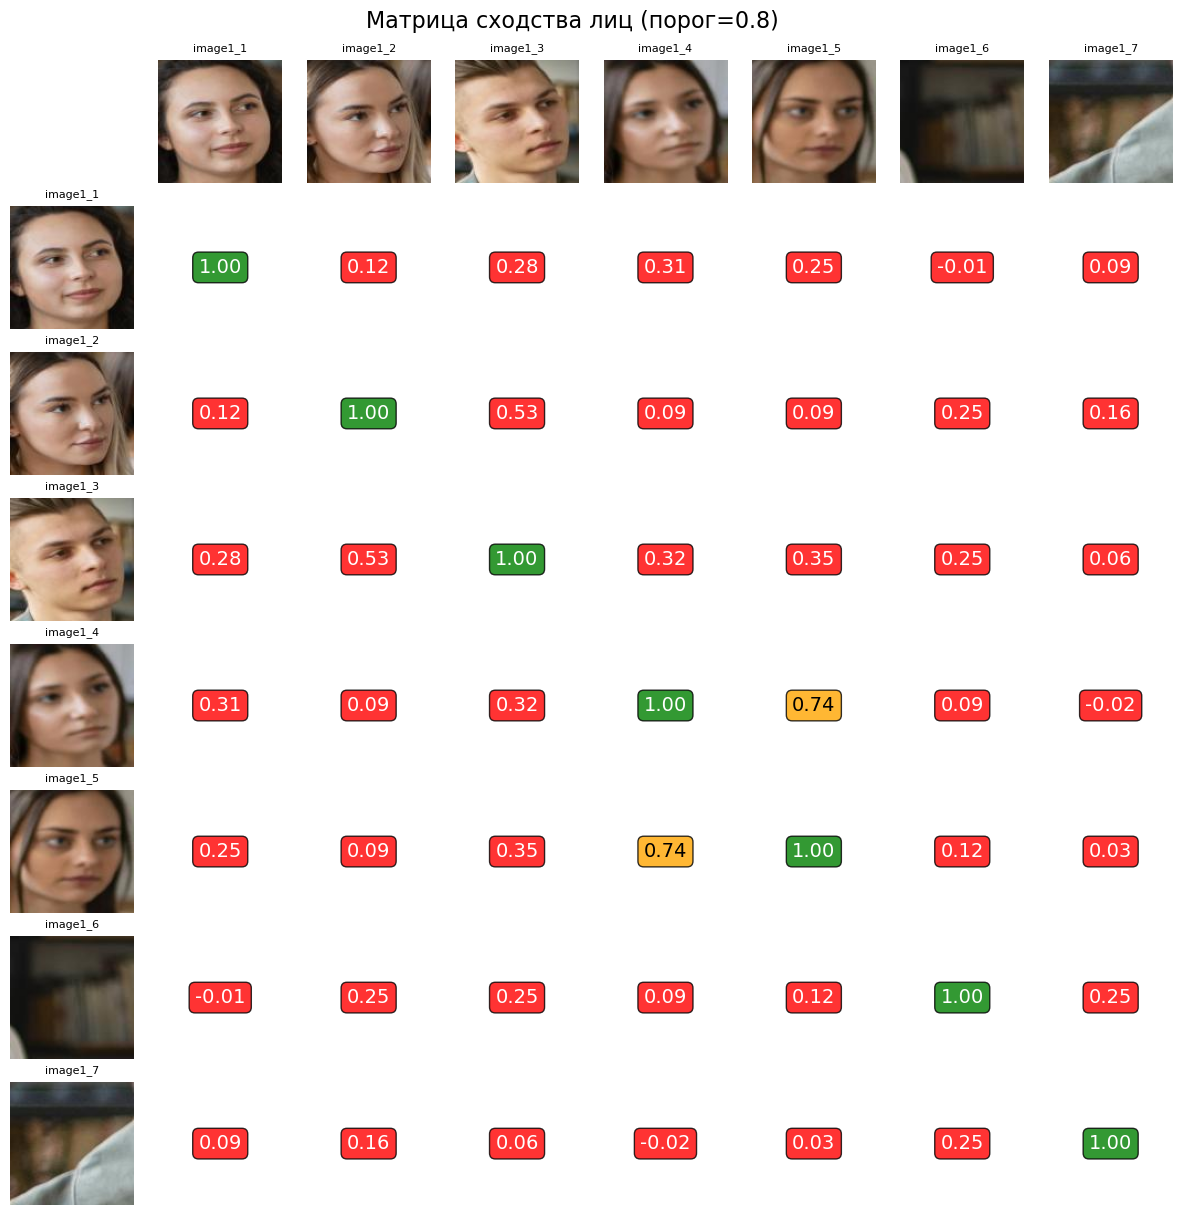

In [168]:
# распознавание на одном изображении (сравнение лиц между собой)
image_path = 'image1.jpg'
output_dir = 'output/compare_img1' # папка для результатов

# Распознаем лица
res_image1 = pipeline.recognize(
    image_path=image_path,
    output_dir=output_dir
)


# сравниваем лица между собой - используем одно и то же изображение дважды
if res_image1['num_faces'] > 1:
    # визуализируем матрицу сходства
    visualize_similarity_matrix(
        result1=res_image1,
        result2=res_image1, # то же самое изображение
        output_dir=output_dir,
        show=True, # визуализировать сходство
        threshold=0.8 # порог сходства для визуализации
    )
else:
    print("Недостаточно лиц для сравнения (нужно минимум 2)")

## Распознавание лиц на двух изображениях

На изображении  image1.jpg   обнаружено 7 лиц.
	лицо 1 сохранено в image1_1.jpg;   эмбеддинг получен.
	лицо 2 сохранено в image1_2.jpg;   эмбеддинг получен.
	лицо 3 сохранено в image1_3.jpg;   эмбеддинг получен.
	лицо 4 сохранено в image1_4.jpg;   эмбеддинг получен.
	лицо 5 сохранено в image1_5.jpg;   эмбеддинг получен.
	лицо 6 сохранено в image1_6.jpg;   эмбеддинг получен.
	лицо 7 сохранено в image1_7.jpg;   эмбеддинг получен.
Эмбеддинги сохранены: image1_embeddings.pkl

На изображении  image2.jpg   обнаружено 14 лиц.
	лицо 1 сохранено в image2_1.jpg;   эмбеддинг получен.
	лицо 2 сохранено в image2_2.jpg;   эмбеддинг получен.
	лицо 3 сохранено в image2_3.jpg;   эмбеддинг получен.
	лицо 4 сохранено в image2_4.jpg;   эмбеддинг получен.
	лицо 5 сохранено в image2_5.jpg;   эмбеддинг получен.
	лицо 6 сохранено в image2_6.jpg;   эмбеддинг получен.
	лицо 7 сохранено в image2_7.jpg;   эмбеддинг получен.
	лицо 8 сохранено в image2_8.jpg;   эмбеддинг получен.
	лицо 9 сохранено в image2_9.jpg;  

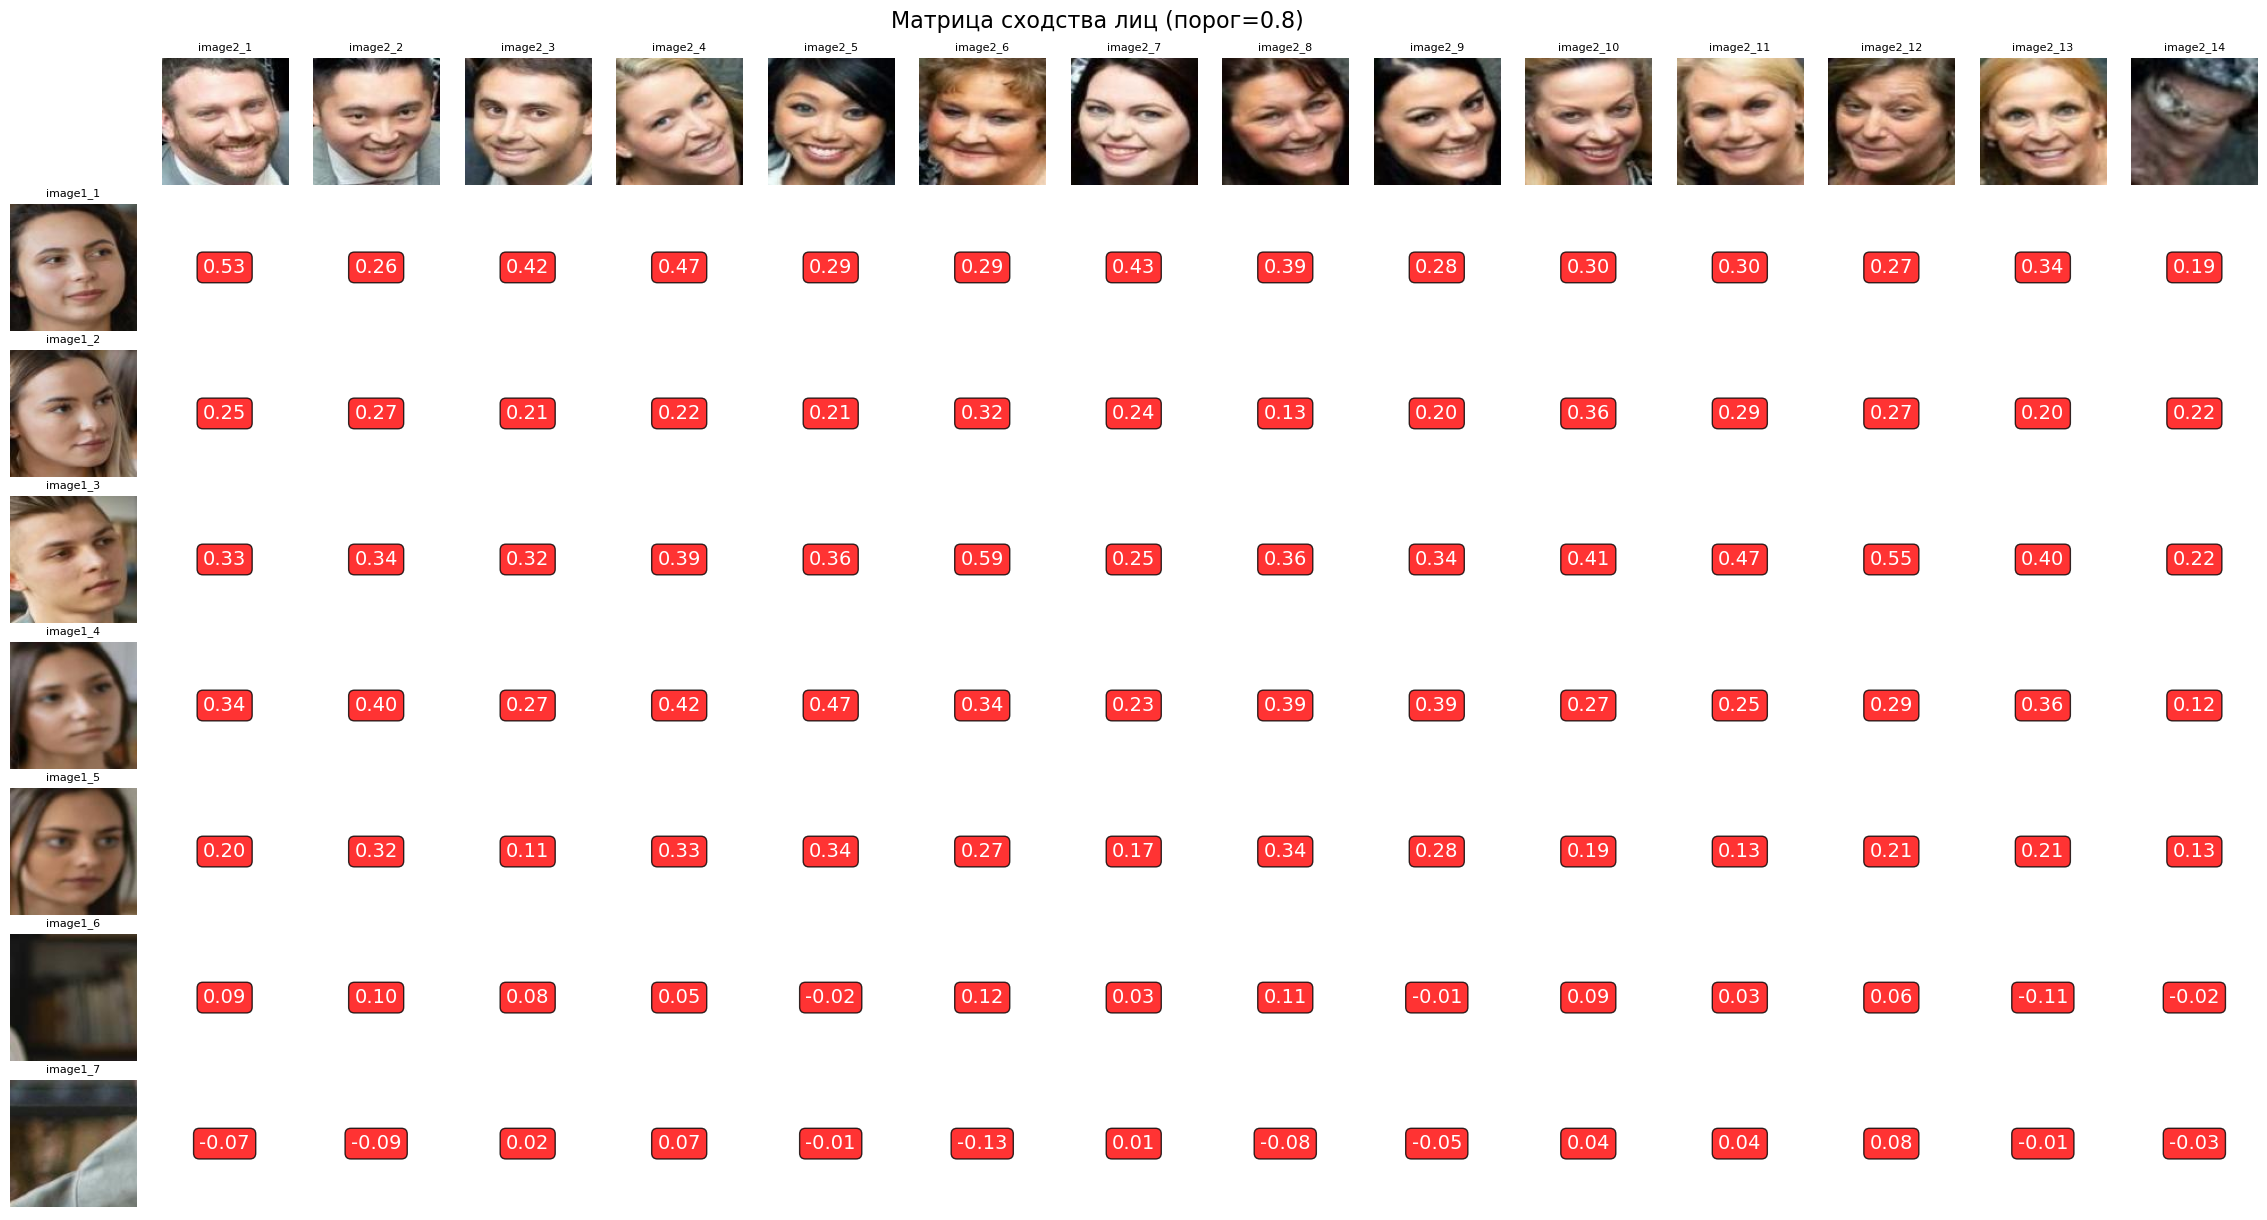

In [169]:
# распознавание на двух изображениях (сравнение лиц между изображениями)
image_path = 'image1.jpg'
image2_path = 'image2.jpg'
output_dir = 'output/compare_img1_img2' # папка для результатов

# Распознаем лица
res_image1 = pipeline.recognize(
    image_path=image_path,
    output_dir=output_dir
)

print()
res_image2 = pipeline.recognize(
    image_path=image2_path,
    output_dir=output_dir
)

# сравниваем лица между изображениями
if (res_image1['num_faces'] > 0) & (res_image2['num_faces'] > 0):
    # визуализируем матрицу сходства
    visualize_similarity_matrix(
        result1=res_image1,
        result2=res_image2, # то же изображение
        output_dir=output_dir,
        show=True, # визуализировать сходство
        threshold=0.8 # порог сходства для визуализации
    )
else:
    print("Недостаточно лиц для сравнения (нужно минимум 2 - по одному на каждом изображении)")

На изображении  image2.jpg   обнаружено 14 лиц.
	лицо 1 сохранено в image2_1.jpg;   эмбеддинг получен.
	лицо 2 сохранено в image2_2.jpg;   эмбеддинг получен.
	лицо 3 сохранено в image2_3.jpg;   эмбеддинг получен.
	лицо 4 сохранено в image2_4.jpg;   эмбеддинг получен.
	лицо 5 сохранено в image2_5.jpg;   эмбеддинг получен.
	лицо 6 сохранено в image2_6.jpg;   эмбеддинг получен.
	лицо 7 сохранено в image2_7.jpg;   эмбеддинг получен.
	лицо 8 сохранено в image2_8.jpg;   эмбеддинг получен.
	лицо 9 сохранено в image2_9.jpg;   эмбеддинг получен.
	лицо 10 сохранено в image2_10.jpg;   эмбеддинг получен.
	лицо 11 сохранено в image2_11.jpg;   эмбеддинг получен.
	лицо 12 сохранено в image2_12.jpg;   эмбеддинг получен.
	лицо 13 сохранено в image2_13.jpg;   эмбеддинг получен.
	лицо 14 сохранено в image2_14.jpg;   эмбеддинг получен.
Эмбеддинги сохранены: image2_embeddings.pkl

На изображении  image3.jpg   обнаружено 6 лиц.
	лицо 1 сохранено в image3_1.jpg;   эмбеддинг получен.
	лицо 2 сохранено в image

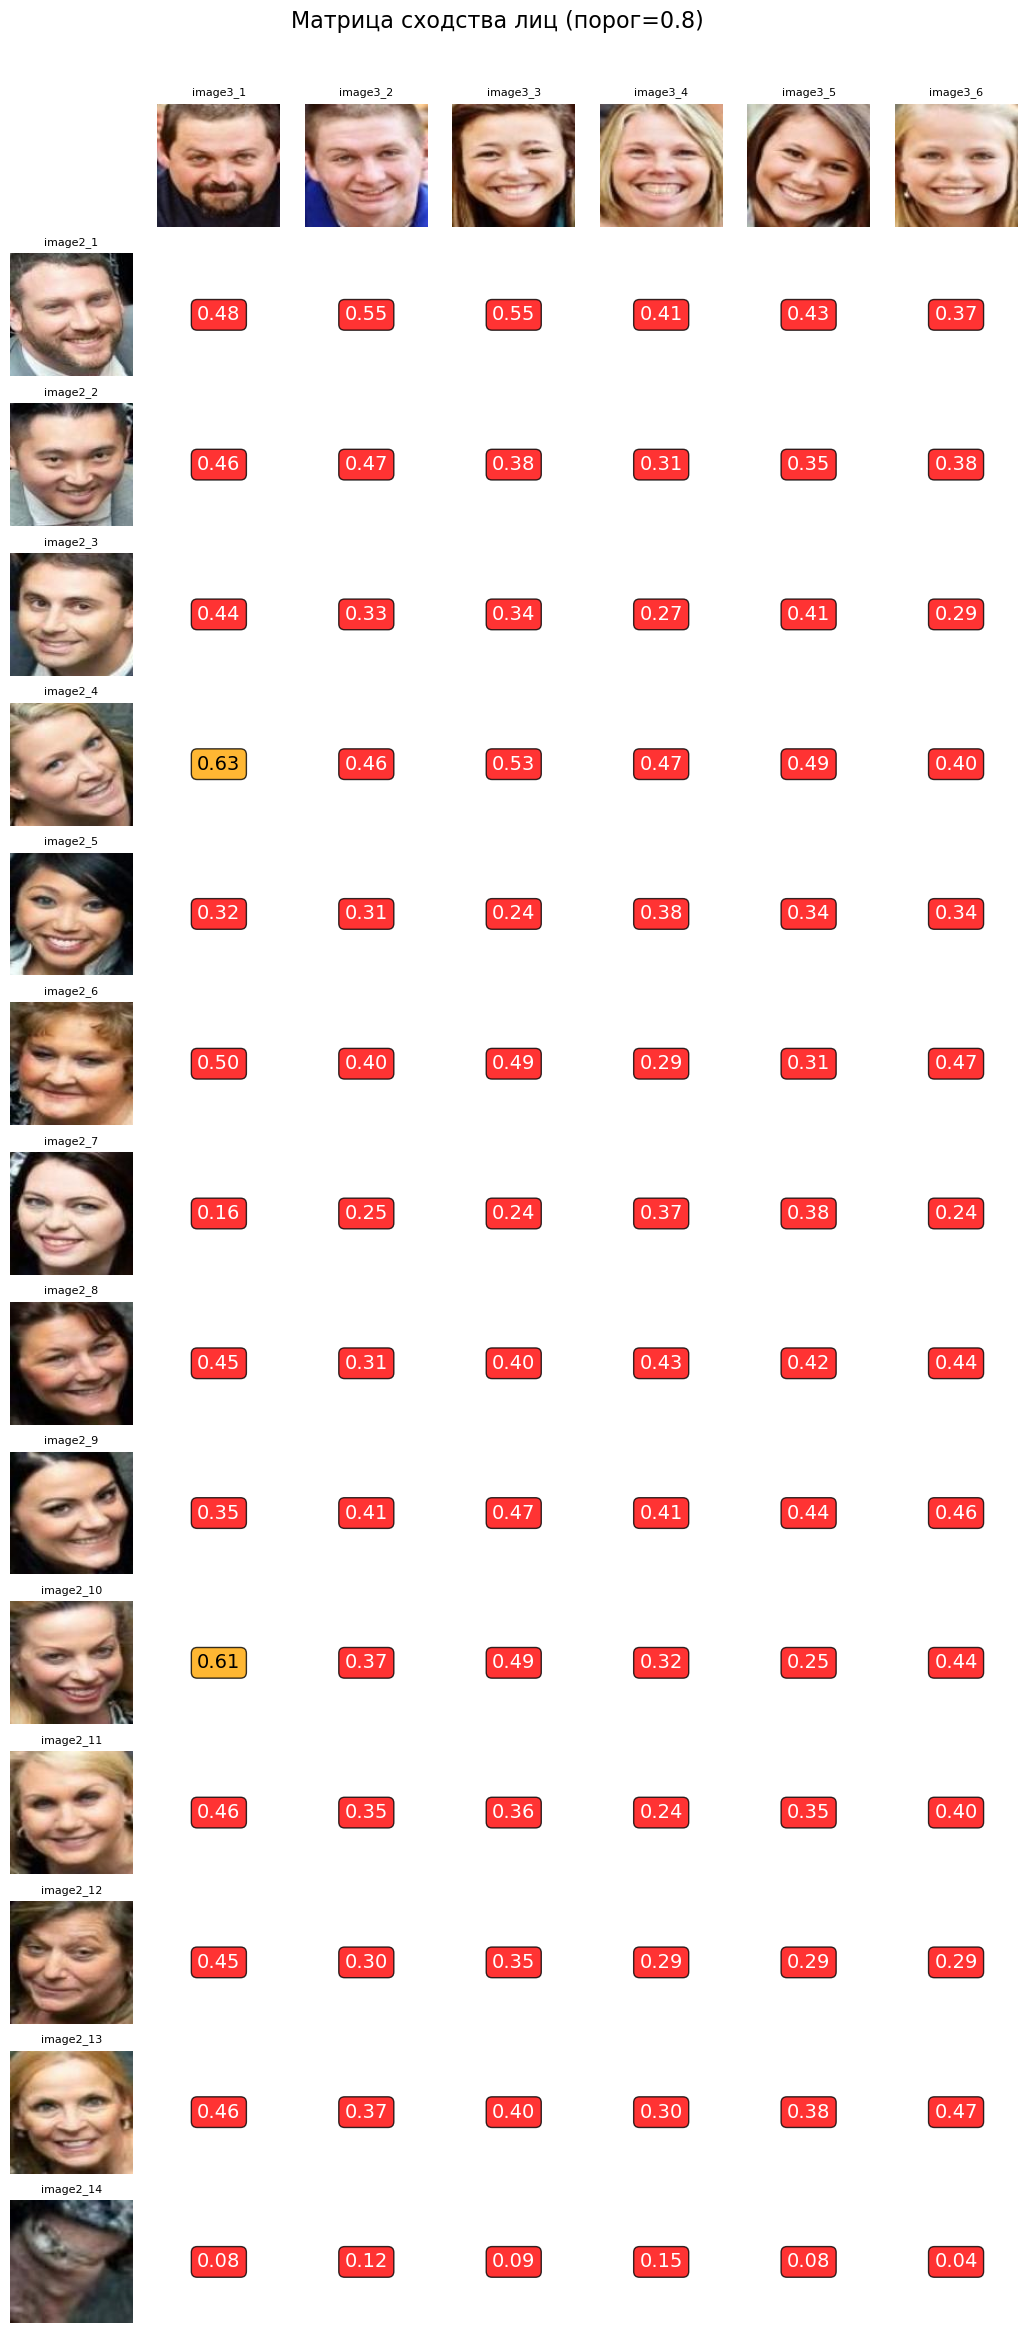

In [170]:
# распознавание на двух изображениях (сравнение лиц между изображениями)
image_path = 'image2.jpg'
image2_path = 'image3.jpg'
output_dir = 'output/compare_img2_img3' # папка для результатов

# Распознаем лица
res_image1 = pipeline.recognize(
    image_path=image_path,
    output_dir=output_dir
)

print()
res_image2 = pipeline.recognize(
    image_path=image2_path,
    output_dir=output_dir
)

# сравниваем лица между изображениями
if (res_image1['num_faces'] > 0) & (res_image2['num_faces'] > 0):
    # визуализируем матрицу сходства
    visualize_similarity_matrix(
        result1=res_image1,
        result2=res_image2, # то же изображение
        output_dir=output_dir,
        show=True, # визуализировать сходство
        threshold=0.8 # порог сходства для визуализации
    )
else:
    print("Недостаточно лиц для сравнения (нужно минимум 2 - по одному на каждом изображении)")

## Терминальный запуск пайплайна

In [164]:
!python pipeline_oav.py --help

usage: pipeline_oav.py [-h] --image IMAGE [--image2 IMAGE2]
                       [--hourglass HOURGLASS] [--arcface ARCFACE]
                       [--output OUTPUT] [--device {cuda,cpu}] [--no-show]
                       [--threshold THRESHOLD]

Пайплайн распознавания лиц: детекция -> лендмарки -> выравнивание -> эмбеддинги

options:
  -h, --help            show this help message and exit
  --image IMAGE         Путь к входному изображению (для сравнения лиц на одном изображении)
  --image2 IMAGE2       Путь ко второму изображению (для сравнения двух изображений)
  --hourglass HOURGLASS
                        Файл с весами модели StackedHourglass
  --arcface ARCFACE     Файл с весами модели StackedHourglass
  --output OUTPUT       Папка для сохранения результатов (кропы, эмбеддинги, визуализация). Если не указана — ничего не сохраняется.
  --device {cuda,cpu}   Устройство для вычислений
  --no-show             Не отображать графики на экране (только сохранение в файл при --output)

In [ ]:
# запуск без явного указания папки с результатами, будет сгенерирована случайная папка

!python pipeline_oav.py --image image2.jpg --threshold 0.8 --no-show

Вычислительное устройство: cuda
Модель детектора mtcnn создана!
Модель StackedHourglass создана, веса загружены: checkpoints/StackedHourglass_best_model_nme_20260123_233506_epoch_64_nme_5.60.pth
Модель ArcFace создана, веса загружены: checkpoints/arcface_model_20260126_163544_epoch_38_val_0.7848.pth
Распознавание лиц на изображении: image2.jpg
На изображении  image2.jpg   обнаружено 14 лиц.
	лицо 1 сохранено в image2_1.jpg;   эмбеддинг получен.
	лицо 2 сохранено в image2_2.jpg;   эмбеддинг получен.
	лицо 3 сохранено в image2_3.jpg;   эмбеддинг получен.
	лицо 4 сохранено в image2_4.jpg;   эмбеддинг получен.
	лицо 5 сохранено в image2_5.jpg;   эмбеддинг получен.
	лицо 6 сохранено в image2_6.jpg;   эмбеддинг получен.
	лицо 7 сохранено в image2_7.jpg;   эмбеддинг получен.
	лицо 8 сохранено в image2_8.jpg;   эмбеддинг получен.
	лицо 9 сохранено в image2_9.jpg;   эмбеддинг получен.
	лицо 10 сохранено в image2_10.jpg;   эмбеддинг получен.
	лицо 11 сохранено в image2_11.jpg;   эмбеддинг получе

In [165]:
!python pipeline_oav.py --image image1.jpg --image2 image3.jpg --output output/compare_img1_img3_console --threshold 0.8

Вычислительное устройство: cuda
Модель детектора mtcnn создана!
Модель StackedHourglass создана, веса загружены: checkpoints/StackedHourglass_best_model_nme_20260123_233506_epoch_64_nme_5.60.pth
Модель ArcFace создана, веса загружены: checkpoints/arcface_model_20260126_163544_epoch_38_val_0.7848.pth
Распознавание лиц на изображении: image1.jpg
На изображении  image1.jpg   обнаружено 7 лиц.
	лицо 1 сохранено в image1_1.jpg;   эмбеддинг получен.
	лицо 2 сохранено в image1_2.jpg;   эмбеддинг получен.
	лицо 3 сохранено в image1_3.jpg;   эмбеддинг получен.
	лицо 4 сохранено в image1_4.jpg;   эмбеддинг получен.
	лицо 5 сохранено в image1_5.jpg;   эмбеддинг получен.
	лицо 6 сохранено в image1_6.jpg;   эмбеддинг получен.
	лицо 7 сохранено в image1_7.jpg;   эмбеддинг получен.
Эмбеддинги сохранены: image1_embeddings.pkl
	обнаружено 7 лиц

Распознавание лиц на изображении: image3.jpg
На изображении  image3.jpg   обнаружено 6 лиц.
	лицо 1 сохранено в image3_1.jpg;   эмбеддинг получен.
	лицо 2 сохр